#Grupo 25 - Entregable EyCD

#Parte 2 de 2

Integrantes:

Rufeil Fiori, Elena

Sosa, Manuel

Taié Mirón, Macarena

Yurovich, Luis Federico

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 2


En el ejercicio 1 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad. Además de ello, tuvieron que reducir el número de valores posibles para las variables categóricas utilizando información de dominio.

En esta notebook, **se utilizará resultado de dichas operaciones.**


In [ ]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
seaborn.set_context('talk')

In [ ]:
# Leemos el conjunto de datos que ya tenemos
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
#Conjunto de datos creado en la parte 1 de este entregable
melb_df_processed = pandas.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTiB2CSKuF_JIUfRgt2Dr5AWvnLULUTlIEWNgAvaW1dqdbdNP8bWiyNouZhzVEuMiTiaVrUyeQ6Mfuj/pub?output=csv")
melb_df_processed.head()

,Rooms,Bedroom2,Bathroom,Distance,Car,Landsize,BuildingArea,YearBuilt,Price,Type,...,airbnb_price_min,airbnb_price_mean,airbnb_price_max,airbnb_weekly_price_min,airbnb_weekly_price_mean,airbnb_weekly_price_max,airbnb_monthly_price_min,airbnb_monthly_price_mean,airbnb_monthly_price_max,zipcode_count
0,2,2,1,2.5,1.0,202,NaN,NaN,1480000,h,...,28.0,140.292994,900.0,180.0,236.250000,360.0,700.0,956.363636,1440.0,157.0
1,2,2,1,2.5,1.0,202,NaN,NaN,1480000,h,...,30.0,115.594059,400.0,180.0,735.352941,3248.0,700.0,2863.900000,11011.0,101.0
2,2,2,1,2.5,0.0,156,79.0,1900.0,1035000,h,...,28.0,140.292994,900.0,180.0,236.250000,360.0,700.0,956.363636,1440.0,157.0
3,2,2,1,2.5,0.0,156,79.0,1900.0,1035000,h,...,30.0,115.594059,400.0,180.0,735.352941,3248.0,700.0,2863.900000,11011.0,101.0
4,3,3,2,2.5,0.0,134,150.0,1900.0,1465000,h,...,28.0,140.292994,900.0,180.0,236.250000,360.0,700.0,956.363636,1440.0,157.0


## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila para variables categóricas y las adjuntamos al dataset.


###Dejamos copias del dataset original y armamos un dataset con solo dos columnas


In [ ]:
df_original = melb_df_processed.copy()

In [ ]:
# Reservamos en otro data frame las dos columnas para juntar despues:
melb_df_2 = melb_df_processed[["BuildingArea", "YearBuilt"]]
price_column = melb_df_processed.Price

###Pasamos las variables categóricas a numéricas y agregamos esas columnas al final del dataset

In [ ]:
categorical_cols = ['Type',"Suburb",'CouncilArea']
cols =  categorical_cols

# Drop columns
melb_df_processed = melb_df_processed.drop(columns = [
                                                      "zipcode", 
                                                      "Postcode",
                                                      "zipcode_count",
                                                      "Price"
                                                      ])

In [ ]:
melb_df_processed[categorical_cols].nunique()

Type             3
Suburb         180
CouncilArea     26
dtype: int64

In [ ]:
# Check for nulls
melb_df_processed.isnull().sum() / melb_df_processed.shape[0]

Rooms                        0.000000
Bedroom2                     0.000000
Bathroom                     0.000000
Distance                     0.000000
Car                          0.006001
Landsize                     0.000000
BuildingArea                 0.474808
YearBuilt                    0.388096
Type                         0.000000
Suburb                       0.000000
CouncilArea                  0.080279
airbnb_price_min             0.122716
airbnb_price_mean            0.122716
airbnb_price_max             0.122716
airbnb_weekly_price_min      0.579306
airbnb_weekly_price_mean     0.579306
airbnb_weekly_price_max      0.579306
airbnb_monthly_price_min     0.589199
airbnb_monthly_price_mean    0.589199
airbnb_monthly_price_max     0.589199
dtype: float64

In [ ]:
encoded_types = pandas.get_dummies(melb_df_processed)
print(encoded_types.shape)
encoded_types.head()

(18498, 226)


,Rooms,Bedroom2,Bathroom,Distance,Car,Landsize,BuildingArea,YearBuilt,airbnb_price_min,airbnb_price_mean,...,CouncilArea_Monash,CouncilArea_Moonee Valley,CouncilArea_Moreland,CouncilArea_Nillumbik,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Whitehorse,CouncilArea_Whittlesea,CouncilArea_Wyndham,CouncilArea_Yarra
0,2,2,1,2.5,1.0,202,NaN,NaN,28.0,140.292994,...,0,0,0,0,0,0,0,0,0,1
1,2,2,1,2.5,1.0,202,NaN,NaN,30.0,115.594059,...,0,0,0,0,0,0,0,0,0,1
2,2,2,1,2.5,0.0,156,79.0,1900.0,28.0,140.292994,...,0,0,0,0,0,0,0,0,0,1
3,2,2,1,2.5,0.0,156,79.0,1900.0,30.0,115.594059,...,0,0,0,0,0,0,0,0,0,1
4,3,3,2,2.5,0.0,134,150.0,1900.0,28.0,140.292994,...,0,0,0,0,0,0,0,0,0,1


## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
import missingno as msno


### Estandarizamos

Es necesario estandarizar los datos ya que el KNN usa distancias. El iterative imputer usa al KNN, por lo que también necesita la estandarización.

In [ ]:
columns_to_encode = ['Rooms', 'Bedroom2', 'Bathroom', 'Distance', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'airbnb_price_min', 'airbnb_price_mean',
       'airbnb_price_max', 'airbnb_weekly_price_min',
       'airbnb_weekly_price_mean', 'airbnb_weekly_price_max',
       'airbnb_monthly_price_min', 'airbnb_monthly_price_mean',
       'airbnb_monthly_price_max']

In [ ]:
scaler = MinMaxScaler()
scaler.fit(encoded_types[columns_to_encode])
print(scaler.data_max_)
#help(MinMaxScaler)   #inverse_transform(self, X)

[5.00000000e+00 5.00000000e+00 3.00000000e+00 2.50000000e+01
 4.00000000e+00 1.23000000e+04 1.56100000e+03 2.01800000e+03
 8.40000000e+01 2.91174603e+02 9.00000000e+03 9.50000000e+02
 1.81072727e+03 1.10320000e+04 4.60000000e+03 8.55433333e+03
 5.42580000e+04]


In [ ]:
encoded_types.loc[:, columns_to_encode] = scaler.transform(encoded_types[columns_to_encode])
display(encoded_types)

,Rooms,Bedroom2,Bathroom,Distance,Car,Landsize,BuildingArea,YearBuilt,airbnb_price_min,airbnb_price_mean,...,CouncilArea_Monash,CouncilArea_Moonee Valley,CouncilArea_Moreland,CouncilArea_Nillumbik,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Whitehorse,CouncilArea_Whittlesea,CouncilArea_Wyndham,CouncilArea_Yarra
0,0.25,0.25,0.333333,0.100,0.25,0.016423,NaN,NaN,0.333333,0.337778,...,0,0,0,0,0,0,0,0,0,1
1,0.25,0.25,0.333333,0.100,0.25,0.016423,NaN,NaN,0.357143,0.229373,...,0,0,0,0,0,0,0,0,0,1
2,0.25,0.25,0.333333,0.100,0.00,0.012683,0.050609,0.271605,0.333333,0.337778,...,0,0,0,0,0,0,0,0,0,1
3,0.25,0.25,0.333333,0.100,0.00,0.012683,0.050609,0.271605,0.357143,0.229373,...,0,0,0,0,0,0,0,0,0,1
4,0.50,0.50,0.666667,0.100,0.00,0.010894,0.096092,0.271605,0.333333,0.337778,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18493,0.75,0.75,0.666667,0.668,0.50,0.053008,NaN,0.771605,0.357143,0.217622,...,0,0,0,0,0,0,0,0,0,0
18494,0.50,0.50,0.666667,0.272,0.50,0.027073,0.085202,0.858025,0.714286,0.599589,...,0,0,0,0,0,0,0,0,0,0
18495,0.50,0.50,0.666667,0.272,1.00,0.035447,NaN,0.870370,0.714286,0.599589,...,0,0,0,0,0,0,0,0,0,0
18496,0.75,0.75,0.333333,0.252,0.25,0.029431,0.071749,0.395062,0.297619,0.281733,...,0,0,0,0,0,0,0,0,0,0


## KNN imputation


Primero graficamos estas columnas antes de imputar.

In [ ]:
null_columns = ["BuildingArea", "YearBuilt"]

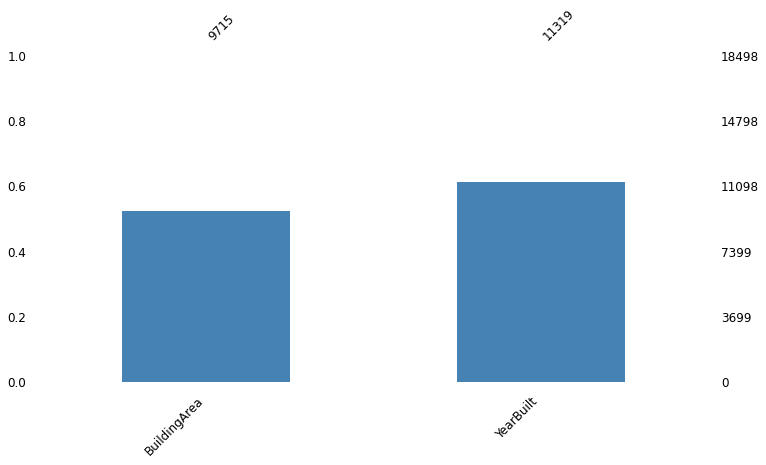

In [ ]:
msno.bar(encoded_types.loc[:,null_columns],figsize=(12, 6), fontsize=12, color='steelblue')

In [ ]:
#Imputamos

knn_imputer = KNNImputer(n_neighbors=5, weights="uniform")

encoded_types_imputed_knn = pandas.DataFrame(knn_imputer.fit_transform(encoded_types.loc[:,:]),
                                     columns = encoded_types.loc[:,:].columns)

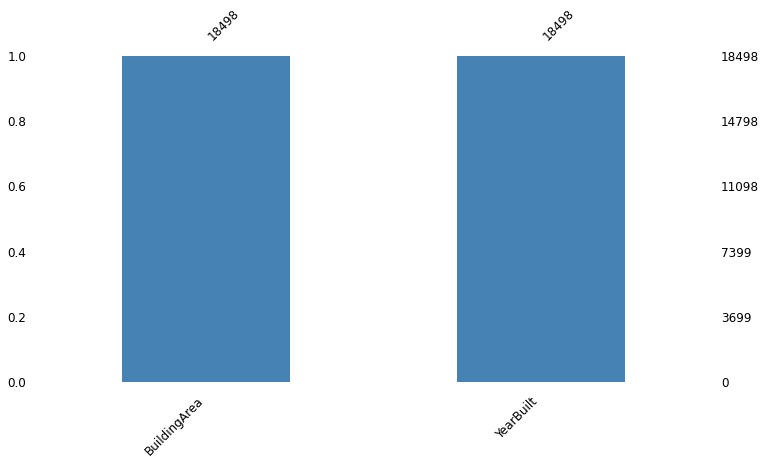

In [ ]:
#Ahora graficamos después de imputar:

msno.bar(encoded_types_imputed_knn.loc[:,null_columns],figsize=(12, 6), fontsize=12, color='steelblue')

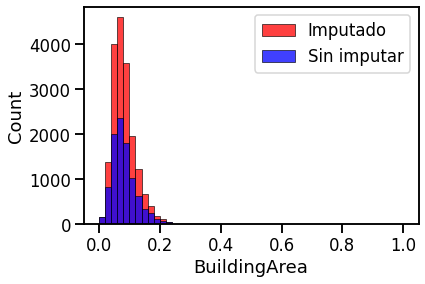

In [ ]:
#Graficamos la distribución de los datos sin imputar e imputados para la columna BuildingArea:
seaborn.histplot(encoded_types_imputed_knn,x='BuildingArea',bins=50, color='red', label = "Imputado")
seaborn.histplot(encoded_types,x='BuildingArea',bins=50,color='blue', label = "Sin imputar")
plt.legend()
plt.show()

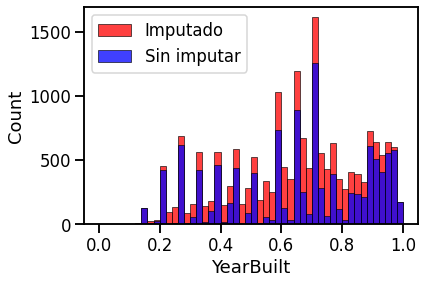

In [ ]:
#Graficamos la distribución de los datos sin imputar e imputados para la columna YearBuilt:
seaborn.histplot(encoded_types_imputed_knn,x='YearBuilt',bins=50, color='red', label = "Imputado")
seaborn.histplot(encoded_types,x='YearBuilt',bins=50,color='blue', label = "Sin imputar")
plt.legend()
plt.show()

En esta sección los valores nulos fueron imputados por un modelo KNN de n_neighbours = 5. Observamos que el modelo funcionó bien, distribuyendo los valores imputados a lo largo del rango de cada variable.

## Imputación múltiple por ecuaciones encadenadas (MICE) 

En esta sección utilizaremos el método MICE para imputar datos.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

melb_df_2_sca_mice = encoded_types.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=DecisionTreeRegressor()) # Lo cambie a DecisionTreeRegressor porque consume menos RAM

melb_df_2_sca_mice = pandas.DataFrame(mice_imputer.fit_transform(melb_df_2_sca_mice),columns = melb_df_2_sca_mice.columns)


/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


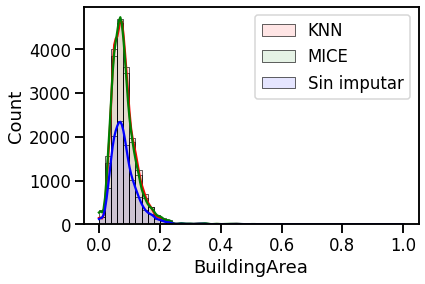

In [ ]:
#Comparamos la distribución de los datos sin imputar, imputados con KNN e imputados con MICE para la columna BuildingArea:
seaborn.histplot(encoded_types_imputed_knn,x='BuildingArea',bins=50, color='red', label = "KNN", alpha = 0.1, kde = True)
seaborn.histplot(melb_df_2_sca_mice,x='BuildingArea',bins=50, color='green', label = "MICE", alpha = 0.1, kde = True )
seaborn.histplot(encoded_types,x='BuildingArea',bins=50,color='blue', label = "Sin imputar", alpha = 0.1, kde = True)
plt.legend()


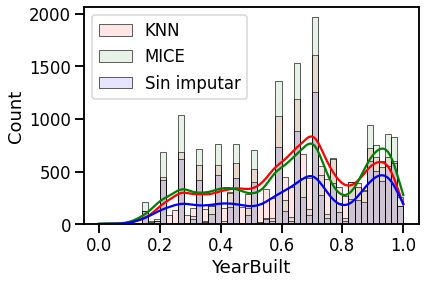

In [ ]:
#Comparamos la distribución de los datos sin imputar, imputados con KNN e imputados con MICE para la columna YearBuilt:
seaborn.histplot(encoded_types_imputed_knn,x='YearBuilt',bins=50, color='red', label = "KNN", alpha = 0.1, kde = True)
seaborn.histplot(melb_df_2_sca_mice,x='YearBuilt',bins=50, color='green', label = "MICE",  alpha = 0.1, kde = True )
seaborn.histplot(encoded_types,x='YearBuilt',bins=50,color='blue', label = "Sin imputar",  alpha = 0.1, kde = True)
plt.legend()

Notamos que el método MICE no mejora mucho la distribución de los datos imputados con respecto al método KNN, y por el otro lado, requiere un tiempo más de cómputo y más espacio de memoria RAM.



## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

In [ ]:
# Elegir el de mejor performance
pca_df = encoded_types_imputed_knn.copy()
#pca_df = melb_df_2_sca_mice.copy()

In [ ]:
pca_df

,Rooms,Bedroom2,Bathroom,Distance,Car,Landsize,BuildingArea,YearBuilt,airbnb_price_min,airbnb_price_mean,...,CouncilArea_Monash,CouncilArea_Moonee Valley,CouncilArea_Moreland,CouncilArea_Nillumbik,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Whitehorse,CouncilArea_Whittlesea,CouncilArea_Wyndham,CouncilArea_Yarra
0,0.25,0.25,0.333333,0.100,0.25,0.016423,0.055221,0.450617,0.333333,0.337778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.25,0.25,0.333333,0.100,0.25,0.016423,0.055221,0.450617,0.357143,0.229373,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.25,0.25,0.333333,0.100,0.00,0.012683,0.050609,0.271605,0.333333,0.337778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.25,0.25,0.333333,0.100,0.00,0.012683,0.050609,0.271605,0.357143,0.229373,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.50,0.50,0.666667,0.100,0.00,0.010894,0.096092,0.271605,0.333333,0.337778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18493,0.75,0.75,0.666667,0.668,0.50,0.053008,0.147726,0.771605,0.357143,0.217622,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18494,0.50,0.50,0.666667,0.272,0.50,0.027073,0.085202,0.858025,0.714286,0.599589,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18495,0.50,0.50,0.666667,0.272,1.00,0.035447,0.120436,0.870370,0.714286,0.599589,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18496,0.75,0.75,0.333333,0.252,0.25,0.029431,0.071749,0.395062,0.297619,0.281733,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Es necesario estandarizar los datos para que se mantenga la distribución de los mismos.

In [ ]:
from sklearn.decomposition import PCA

#definir m según indicaciones
m = 20

principal_components_labels = [f"PC" + str(i) for i in range(1,m+1)]

pca = PCA(n_components=m )
pca.fit(pca_df)
#print("Principal components")
#print(pca.components_)
print("Explained variance ratio")
explained_ratio = pca.explained_variance_ratio_
#print("Varianza de cada PC ", pca.explained_variance_ratio_)
print(f"Varianza total con {m} componentes ", pca.explained_variance_ratio_.sum())

Explained variance ratio
Varianza total con 20 componentes  0.6506992178761452


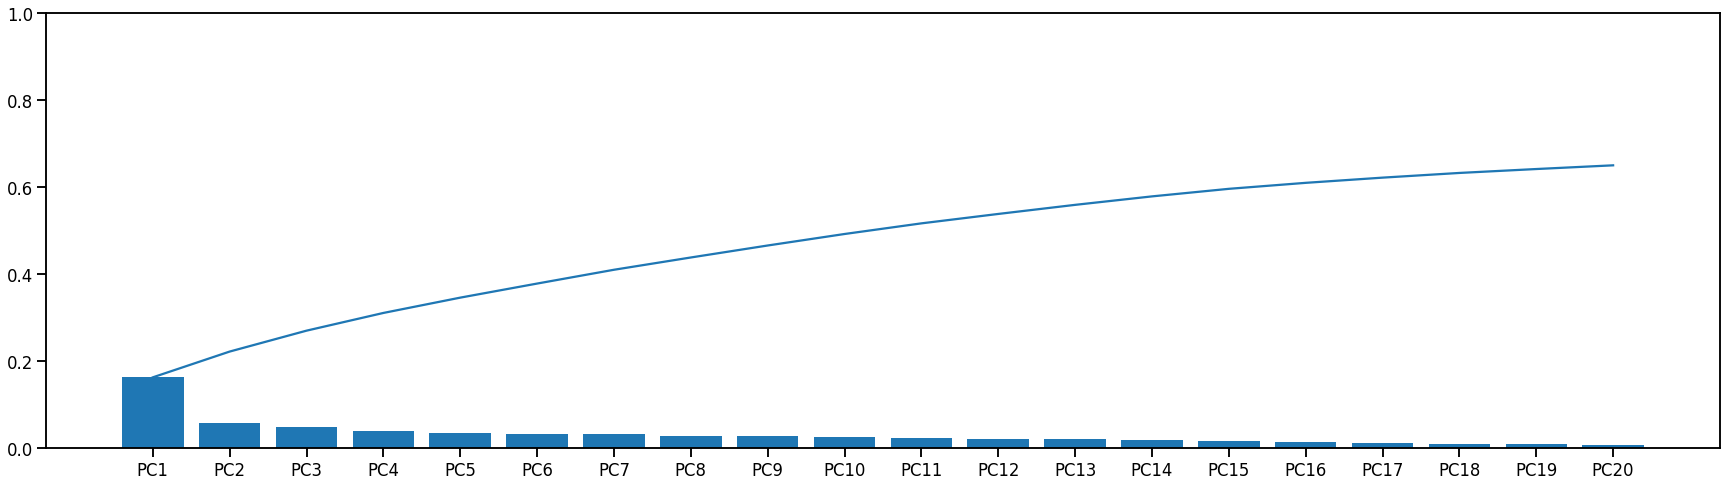

In [ ]:
fig,ax = plt.subplots(figsize = [30,8])
ax.bar(x = principal_components_labels, height = explained_ratio)
ax.plot(principal_components_labels, explained_ratio.cumsum())
ax.set_ylim([0,1])
# Rotar labels de eje X
plt.show()

In [ ]:
encoded_types_reduced = pca.transform(pca_df)
encoded_types_reduced = pandas.DataFrame(encoded_types_reduced, columns = principal_components_labels)

#seaborn.pairplot(encoded_types_reduced)
encoded_types_reduced

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-0.340332,0.091543,-0.523919,0.147165,0.479236,-0.074625,0.555978,-0.510016,0.009242,-0.051219,-0.068049,-0.194500,-0.084190,0.267202,-0.093739,0.009507,-0.187492,-0.177563,-0.031558,0.005833
1,-0.279593,0.396608,-0.418395,0.221737,0.473795,-0.021448,0.507078,-0.501501,0.012350,-0.117697,-0.063165,-0.141694,-0.068910,0.103218,0.011069,-0.103802,-0.117718,-0.088510,0.002789,0.011796
2,-0.338351,0.148517,-0.616226,0.172658,0.517469,-0.075822,0.613057,-0.506367,-0.000172,-0.013023,0.001552,-0.165925,-0.084490,0.288443,-0.142505,0.140151,-0.206071,0.011317,-0.065363,0.000105
3,-0.277613,0.453582,-0.510702,0.247231,0.512027,-0.022645,0.564157,-0.497852,0.002936,-0.079501,0.006436,-0.113118,-0.069210,0.124459,-0.037697,0.026841,-0.136298,0.100370,-0.031015,0.006067
4,-0.481602,0.120241,-0.400267,0.087435,0.458680,-0.100081,0.514531,-0.559657,0.012944,-0.014380,-0.156091,-0.324258,-0.000837,0.137205,-0.278394,0.285937,-0.174138,0.095544,-0.125252,-0.023251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18493,-0.634963,-0.187244,0.176009,-0.160663,-0.100247,-0.129877,-0.192948,-0.074158,0.001855,-0.061535,-0.168692,-0.148351,0.062330,0.027229,0.012649,-0.063358,-0.082680,0.033145,-0.076809,-0.090677
18494,-0.440698,0.020861,0.104342,-0.235253,0.062134,-0.144737,-0.091881,-0.016947,-0.062345,0.053879,-0.103019,-0.021945,0.016975,0.380893,-0.094202,0.039527,0.388740,-0.256009,-0.078287,-0.207350
18495,-0.489690,-0.024180,0.206153,-0.281966,-0.005611,-0.138325,-0.169082,-0.015910,-0.041212,0.001770,-0.184462,-0.067256,-0.003539,0.341130,-0.067809,-0.092745,0.406152,-0.589809,0.123705,-0.090301
18496,-0.560225,0.184016,-0.063039,-0.032320,0.063211,-0.120673,0.042838,0.137336,0.019858,-0.070808,-0.048847,-0.001752,0.057111,-0.115317,-0.048824,0.187981,0.033406,0.222231,0.090778,0.028976


In [ ]:
pca_df_completed = pca_df.join(encoded_types_reduced)
pca_df_completed

,Rooms,Bedroom2,Bathroom,Distance,Car,Landsize,BuildingArea,YearBuilt,airbnb_price_min,airbnb_price_mean,...,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,0.25,0.25,0.333333,0.100,0.25,0.016423,0.055221,0.450617,0.333333,0.337778,...,-0.068049,-0.194500,-0.084190,0.267202,-0.093739,0.009507,-0.187492,-0.177563,-0.031558,0.005833
1,0.25,0.25,0.333333,0.100,0.25,0.016423,0.055221,0.450617,0.357143,0.229373,...,-0.063165,-0.141694,-0.068910,0.103218,0.011069,-0.103802,-0.117718,-0.088510,0.002789,0.011796
2,0.25,0.25,0.333333,0.100,0.00,0.012683,0.050609,0.271605,0.333333,0.337778,...,0.001552,-0.165925,-0.084490,0.288443,-0.142505,0.140151,-0.206071,0.011317,-0.065363,0.000105
3,0.25,0.25,0.333333,0.100,0.00,0.012683,0.050609,0.271605,0.357143,0.229373,...,0.006436,-0.113118,-0.069210,0.124459,-0.037697,0.026841,-0.136298,0.100370,-0.031015,0.006067
4,0.50,0.50,0.666667,0.100,0.00,0.010894,0.096092,0.271605,0.333333,0.337778,...,-0.156091,-0.324258,-0.000837,0.137205,-0.278394,0.285937,-0.174138,0.095544,-0.125252,-0.023251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18493,0.75,0.75,0.666667,0.668,0.50,0.053008,0.147726,0.771605,0.357143,0.217622,...,-0.168692,-0.148351,0.062330,0.027229,0.012649,-0.063358,-0.082680,0.033145,-0.076809,-0.090677
18494,0.50,0.50,0.666667,0.272,0.50,0.027073,0.085202,0.858025,0.714286,0.599589,...,-0.103019,-0.021945,0.016975,0.380893,-0.094202,0.039527,0.388740,-0.256009,-0.078287,-0.207350
18495,0.50,0.50,0.666667,0.272,1.00,0.035447,0.120436,0.870370,0.714286,0.599589,...,-0.184462,-0.067256,-0.003539,0.341130,-0.067809,-0.092745,0.406152,-0.589809,0.123705,-0.090301
18496,0.75,0.75,0.333333,0.252,0.25,0.029431,0.071749,0.395062,0.297619,0.281733,...,-0.048847,-0.001752,0.057111,-0.115317,-0.048824,0.187981,0.033406,0.222231,0.090778,0.028976


## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.



Agregamos columna price

In [ ]:
pca_df_completed = pca_df_completed.join(price_column)
pca_df_completed

,Rooms,Bedroom2,Bathroom,Distance,Car,Landsize,BuildingArea,YearBuilt,airbnb_price_min,airbnb_price_mean,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,Price
0,0.25,0.25,0.333333,0.100,0.25,0.016423,0.055221,0.450617,0.333333,0.337778,...,-0.194500,-0.084190,0.267202,-0.093739,0.009507,-0.187492,-0.177563,-0.031558,0.005833,1480000
1,0.25,0.25,0.333333,0.100,0.25,0.016423,0.055221,0.450617,0.357143,0.229373,...,-0.141694,-0.068910,0.103218,0.011069,-0.103802,-0.117718,-0.088510,0.002789,0.011796,1480000
2,0.25,0.25,0.333333,0.100,0.00,0.012683,0.050609,0.271605,0.333333,0.337778,...,-0.165925,-0.084490,0.288443,-0.142505,0.140151,-0.206071,0.011317,-0.065363,0.000105,1035000
3,0.25,0.25,0.333333,0.100,0.00,0.012683,0.050609,0.271605,0.357143,0.229373,...,-0.113118,-0.069210,0.124459,-0.037697,0.026841,-0.136298,0.100370,-0.031015,0.006067,1035000
4,0.50,0.50,0.666667,0.100,0.00,0.010894,0.096092,0.271605,0.333333,0.337778,...,-0.324258,-0.000837,0.137205,-0.278394,0.285937,-0.174138,0.095544,-0.125252,-0.023251,1465000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18493,0.75,0.75,0.666667,0.668,0.50,0.053008,0.147726,0.771605,0.357143,0.217622,...,-0.148351,0.062330,0.027229,0.012649,-0.063358,-0.082680,0.033145,-0.076809,-0.090677,1245000
18494,0.50,0.50,0.666667,0.272,0.50,0.027073,0.085202,0.858025,0.714286,0.599589,...,-0.021945,0.016975,0.380893,-0.094202,0.039527,0.388740,-0.256009,-0.078287,-0.207350,1031000
18495,0.50,0.50,0.666667,0.272,1.00,0.035447,0.120436,0.870370,0.714286,0.599589,...,-0.067256,-0.003539,0.341130,-0.067809,-0.092745,0.406152,-0.589809,0.123705,-0.090301,1170000
18496,0.75,0.75,0.333333,0.252,0.25,0.029431,0.071749,0.395062,0.297619,0.281733,...,-0.001752,0.057111,-0.115317,-0.048824,0.187981,0.033406,0.222231,0.090778,0.028976,1285000


In [ ]:
pca_df_completed.to_csv("/content/melb_data_final.csv", index=False)

In [ ]:
pca_df_completed

,Rooms,Bedroom2,Bathroom,Distance,Car,Landsize,BuildingArea,YearBuilt,airbnb_price_min,airbnb_price_mean,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,Price
0,0.25,0.25,0.333333,0.100,0.25,0.016423,0.055221,0.450617,0.333333,0.337778,...,-0.194500,-0.084190,0.267202,-0.093739,0.009507,-0.187492,-0.177563,-0.031558,0.005833,1480000
1,0.25,0.25,0.333333,0.100,0.25,0.016423,0.055221,0.450617,0.357143,0.229373,...,-0.141694,-0.068910,0.103218,0.011069,-0.103802,-0.117718,-0.088510,0.002789,0.011796,1480000
2,0.25,0.25,0.333333,0.100,0.00,0.012683,0.050609,0.271605,0.333333,0.337778,...,-0.165925,-0.084490,0.288443,-0.142505,0.140151,-0.206071,0.011317,-0.065363,0.000105,1035000
3,0.25,0.25,0.333333,0.100,0.00,0.012683,0.050609,0.271605,0.357143,0.229373,...,-0.113118,-0.069210,0.124459,-0.037697,0.026841,-0.136298,0.100370,-0.031015,0.006067,1035000
4,0.50,0.50,0.666667,0.100,0.00,0.010894,0.096092,0.271605,0.333333,0.337778,...,-0.324258,-0.000837,0.137205,-0.278394,0.285937,-0.174138,0.095544,-0.125252,-0.023251,1465000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18493,0.75,0.75,0.666667,0.668,0.50,0.053008,0.147726,0.771605,0.357143,0.217622,...,-0.148351,0.062330,0.027229,0.012649,-0.063358,-0.082680,0.033145,-0.076809,-0.090677,1245000
18494,0.50,0.50,0.666667,0.272,0.50,0.027073,0.085202,0.858025,0.714286,0.599589,...,-0.021945,0.016975,0.380893,-0.094202,0.039527,0.388740,-0.256009,-0.078287,-0.207350,1031000
18495,0.50,0.50,0.666667,0.272,1.00,0.035447,0.120436,0.870370,0.714286,0.599589,...,-0.067256,-0.003539,0.341130,-0.067809,-0.092745,0.406152,-0.589809,0.123705,-0.090301,1170000
18496,0.75,0.75,0.333333,0.252,0.25,0.029431,0.071749,0.395062,0.297619,0.281733,...,-0.001752,0.057111,-0.115317,-0.048824,0.187981,0.033406,0.222231,0.090778,0.028976,1285000


## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. 

Adjuntamos a este informe un pdf con la misma informacion que dejamos aquí abajo:



```
## Introducción
Se comienza con dos dataset:
 
- Melbourne df 
Obtenido de:
'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
Consta de 13580 entradas y de las siguientes columnas:
'Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount'.
 
- Airbnb df:
Obtenido de:
'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv'
Consta de 22895 entradas y de las siguientes columnas:
'id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighborhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'requires_license', 'license', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count', 'reviews_per_month'.
 
## Criterios de exclusión de ejemplos
 
Para excluir ejemplos dentro de las características numéricas utilizamos el método de los 3 sigmas: filtramos los valores por encima o por debajo de 3 desvíos estándar de la media de cada columna numérica. Vemos así que el valor de desviación estándar relativa (el desvío dividido la media) disminuye luego de aplicado este método. De esta manera eliminamos un 7.2% de los registros.
Para el caso de las características categóricas lo que utilizamos es el criterio de filtrar aquellas categorías cuya participación es menor a un 0.5% del total de registros. De esta manera eliminamos un 5.6% de los registros.
 
## Características seleccionadas
 
### Características numéricas
Las características numéricas seleccionadas de Melbourne df:
- Rooms: Cantidad de habitaciones
- Bedroom2: Cantidad de dormitorios
- Bathrooms: Cantidad de baños
- Distance: Distancia al centro de la ciudad
- Landsize: Superficie del terreno
- BuildingSize: Superficie construida
- Car: Cantidad de cocheras
- YearBuilt: Año de construcción
- Postcode: Código Postal
 
El Precio para evaluar las predicciones.
 
Algunas características numéricas fueron agregadas de Airbnb df. Estas fueron vinculadas al df de Melbourne a través del Zipcode/Postcode. Se tomaron aquellos Zipcodes de Airbnb con más de 25 entradas. Sólo un 12% de Postcodes no fueron vinculados. Para vincular a un Zipcode varios registros las características fueron resumidas en su valor máximo, mínimo y promedio. Luego, las características numéricas agregadas de Airbnb df son:
- Price_min: Precio mínimo de alquiler por día 
- Price_max: Precio máximo de alquiler por día 
- Price_mean: Precio promedio de alquiler por día 
- Weekly_price_min: Precio mínimo de alquiler por semana
- Weekly_price_max: Precio máximo de alquiler por semana
- Weekly_price_mean: Precio de alquiler por semana
- Monthly_price_min: Precio mínimo de alquiler por mes
- Monthly_price_max: Precio máximo de alquiler por mes
- Monthly_price_mean: Precio promedio de alquiler por mes
- Zipcode: Código postal
 
### Características categóricas
Las características categóricas seleccionadas de Melbourne df:
- Type: tipo de propiedad. 3 valores posibles
- Suburb: Suburbio. 314 valores posibles
- CouncilArea: Municipio. 33 valores posibles
 
Y las características categóricas agregadas de Airbnb df: 
- Neighborhood: Barrio. 59 valores posibles
 
### Transformaciones:
- Todas las características categóricas fueron codificadas con el
 método getdummies. 
- Todas las características numéricas, menos el precio (la cual es la variable objetivo), fueron estandarizadas utilizando el método MinMaxScaler.
- Todas las características numéricas con valores nulos (*) fueron imputadas utilizando el algoritmo KNN, con n_neighbours = 5.
*Cantidad de valores nulos por columna:
Car                            111
BuildingArea                  8783
YearBuilt                     7179
CouncilArea                   1485
zipcode                       2270
airbnb_price_min              2270
airbnb_price_mean             2270
airbnb_price_max              2270
airbnb_weekly_price_min      10716
airbnb_weekly_price_mean     10716
airbnb_weekly_price_max      10716
airbnb_monthly_price_min     10899
airbnb_monthly_price_mean    10899
airbnb_monthly_price_max     10899
 
### Datos aumentados
- Se agregaron las 20 primeras columnas obtenidas a través del método de PCA, aplicado sobre el conjunto de datos totalmente procesado, menos la columna Price. Estas 20 columnas representan a un 65% de la varianza total.
- Se agregó al final del procesamiento la columna Price.
 
### Dataset final
El dataset final queda con 247 columnas numéricas y 18498 filas.

```
